<a href="https://colab.research.google.com/github/SarkarPriyanshu/CarInsuanceClaim/blob/main/Insurance_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BUSINESS PROBLEM STATEMENT

- Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.


In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import drive
drive.mount('/content/gdrivr')

Mounted at /content/gdrivr


In [40]:
df = pd.read_csv('/content/gdrivr/MyDrive/DataSets/Data.csv')

# Basic Analysis

In [3]:
# data dimension
df.shape

(58592, 44)

In [4]:
# how data looks
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
# null values per feature
(df.isna().sum()/df.shape[0] * 100).reset_index().rename(columns={'index':'Features',0:'Null value %'})

,Features,Null value %
0,policy_id,0.0
1,policy_tenure,0.0
2,age_of_car,0.0
3,age_of_policyholder,0.0
4,area_cluster,0.0
5,population_density,0.0
6,make,0.0
7,segment,0.0
8,model,0.0
9,fuel_type,0.0


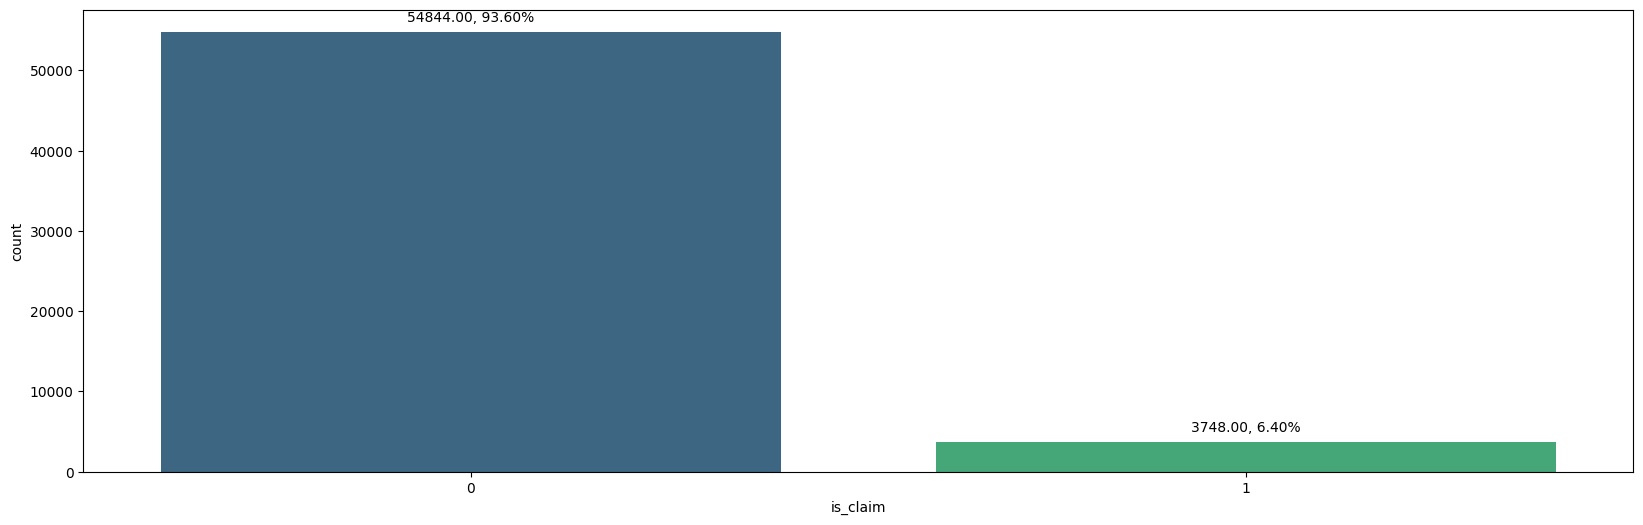

In [6]:
#target features balance or imbalance.

plt.figure(figsize=(20,6))
count = sns.countplot(data=df,x='is_claim',palette='viridis',)
for p in count.patches:
  count.annotate(f'{format(p.get_height(), ".2f")}, {format(p.get_height()/df.shape[0] * 100,".2f")}%' , (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')
plt.show()

In [7]:
# dtypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [8]:
# descriptive analysis of numeric features
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [9]:
# descriptive analysis of categorical features
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
policy_id,58592,58592,ID00001,1
area_cluster,58592,22,C8,13654
segment,58592,6,B2,18314
model,58592,11,M1,14948
fuel_type,58592,3,Petrol,20532
max_torque,58592,9,113Nm@4400rpm,17796
max_power,58592,9,88.50bhp@6000rpm,17796
engine_type,58592,11,F8D Petrol Engine,14948
is_esc,58592,2,No,40191
is_adjustable_steering,58592,2,Yes,35526


In [10]:
# do we have any duplicate observations
df.duplicated().sum()

0

In [41]:
def getNm(string):
  pattern = r'\d+\.*\d+'
  pattern = re.compile(pattern,re.IGNORECASE)
  return re.findall(pattern,string)[0]

def getTorque(string):
  pattern = r'\d+\.*\d+'
  pattern = re.compile(pattern,re.IGNORECASE)
  return re.findall(pattern,string)[1]

df = df.assign(
    max_torque_nm = df['max_torque'].apply(getNm),
    max_torque_torque = df['max_torque'].apply(getTorque),
    max_power_nm = df['max_power'].apply(getNm,),
    max_power_torque = df['max_power'].apply(getTorque),
    age_of_car = df['age_of_car'].apply(lambda x:int(x*100)),
    age_of_policyholder = df['age_of_policyholder'].apply(lambda x:int(x*100))

)
df = df.astype({'max_torque_nm':'float32',
                'max_torque_torque':'int32',
                'max_power_torque':'int32',
                'max_power_nm':'float32',
                'cylinder':'int32',
                'gear_box':'int32'
                })
df.drop(['max_torque','max_power'],axis=1,inplace=True)
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_nm,max_torque_torque,max_power_nm,max_power_torque
0,ID00001,0.515874,5,64,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500,40.360001,6000
1,ID00002,0.672619,2,37,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500,40.360001,6000
2,ID00003,0.841110,2,38,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.0,3500,40.360001,6000
3,ID00004,0.900277,11,43,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113.0,4400,88.500000,6000
4,ID00005,0.596403,11,63,C5,34738,2,A,M3,Petrol,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,91.0,4250,67.059998,5500


# EDA

In [55]:
continues_feature = list()
descrete_feature = list()
categorical_feature = list()
cardinal_feature = list()
target_feature = None



for feature in df.select_dtypes(exclude='object').columns.to_list():
  if feature == 'is_claim':
    target_feature = feature
  else:
      if df[feature].nunique() > 10:
        continues_feature.append(feature)
      else:
        descrete_feature.append(feature)

for feature in df.select_dtypes(include='object').columns.to_list():
   if feature == 'is_claim':
    target_feature = feature
   else:
      if df[feature].nunique() > 10:
        cardinal_feature.append(feature)
      else:
        categorical_feature.append(feature)

print('Continues features counts:',len(continues_feature))
print('Descrete features counts:',len(descrete_feature))
print('Categorical features counts:',len(categorical_feature))
print('High cardianlity features counts:',len(cardinal_feature))

Continues features counts: 5
Descrete features counts: 14
Categorical features counts: 22
High cardianlity features counts: 4


## Univariant Analysis


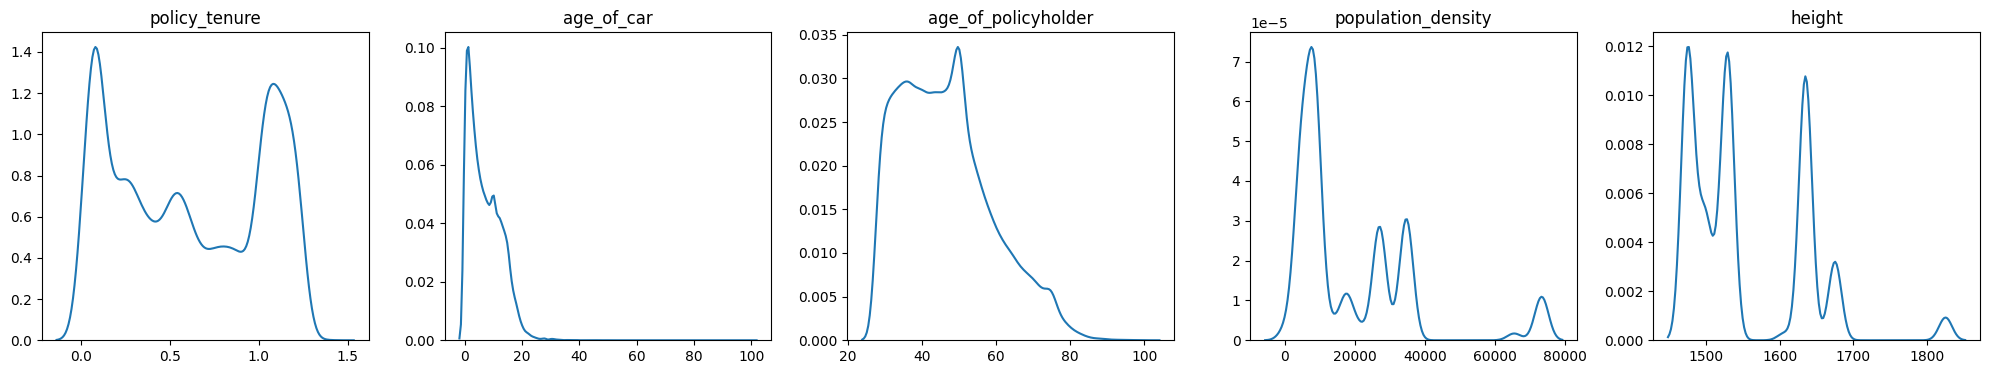

In [37]:
fig,axes = plt.subplots(1,5,figsize=(20,4))
for col,ax in zip(continues_feature,axes.flatten()):
  sns.kdeplot(data=df,x=col,ax=ax)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

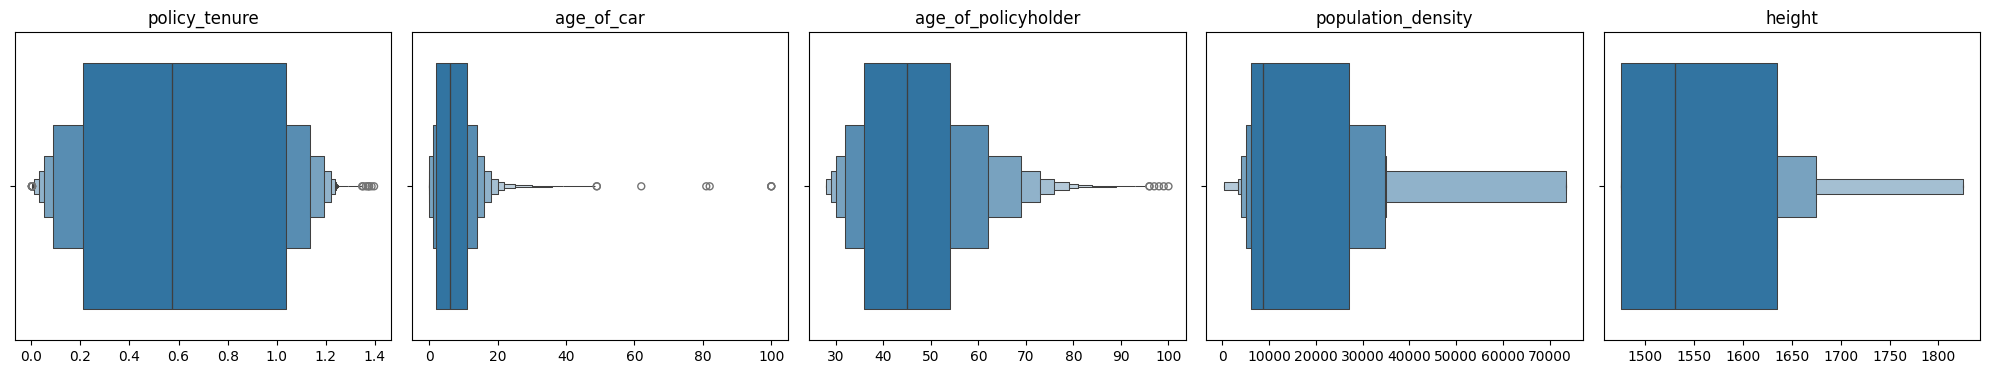

In [38]:
fig,axes = plt.subplots(1,5,figsize=(20,4))
for col,ax in zip(continues_feature,axes.flatten()):
  sns.boxenplot(data=df,x=col,ax=ax)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [39]:
df['cylinder'].value_counts()

,count
cylinder,
4,36735
3,21857


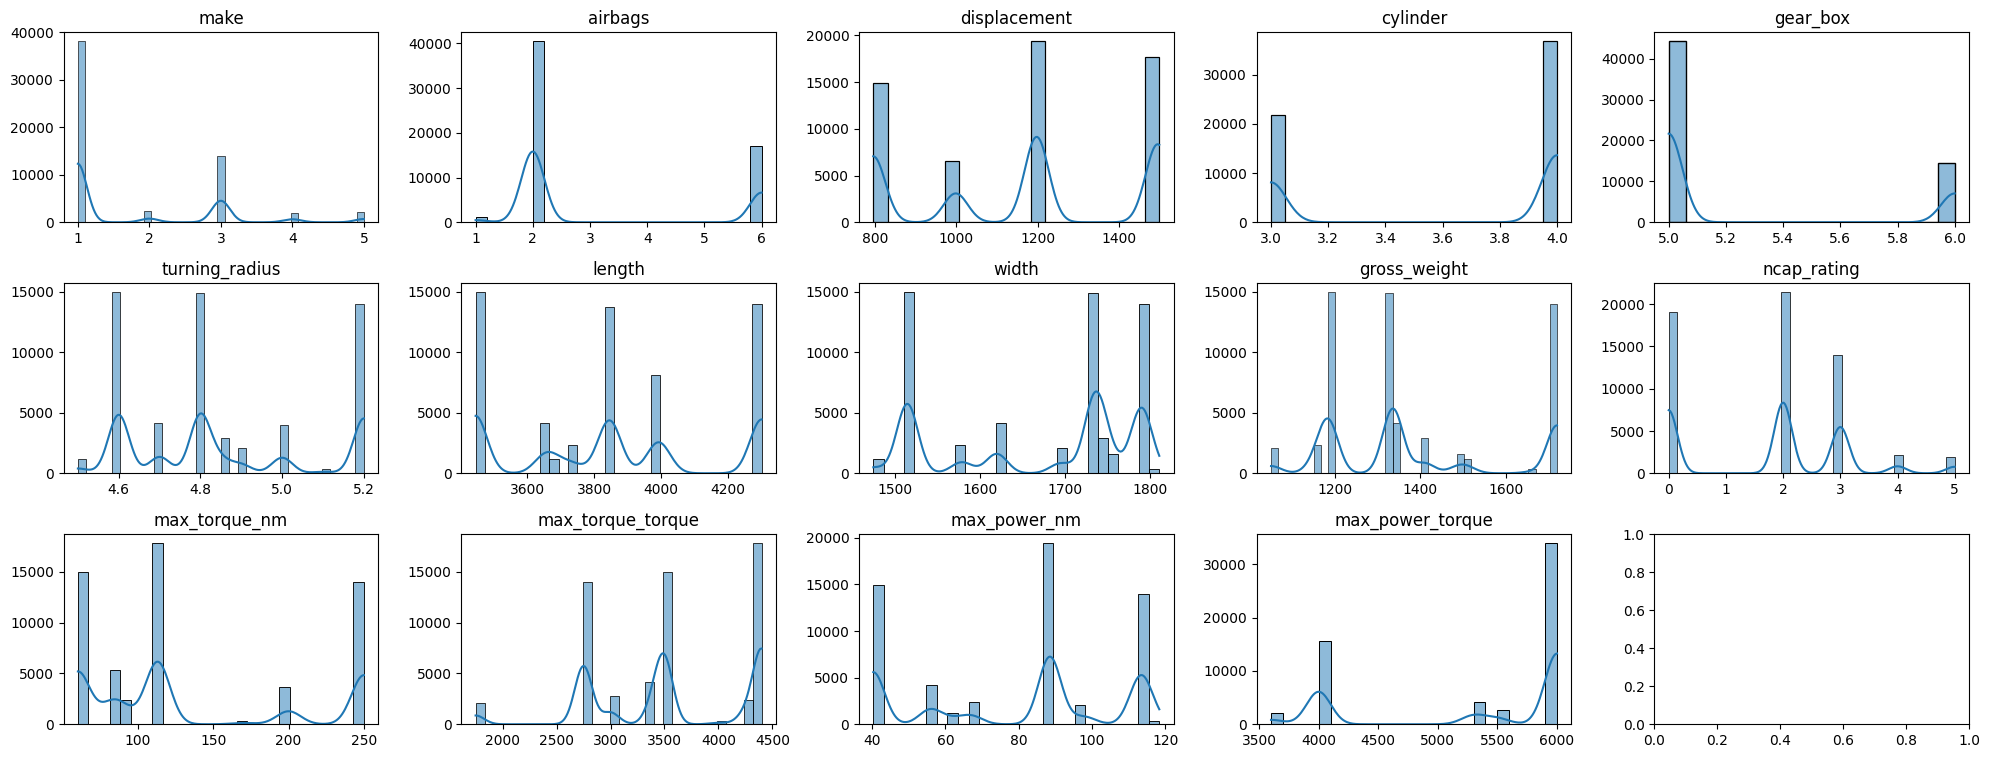

In [14]:
fig,axes = plt.subplots(3,5,figsize=(20,8))
for col,ax in zip(descrete_feature,axes.flatten()):
  sns.histplot(data=df,x=col,ax=ax,kde=True)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

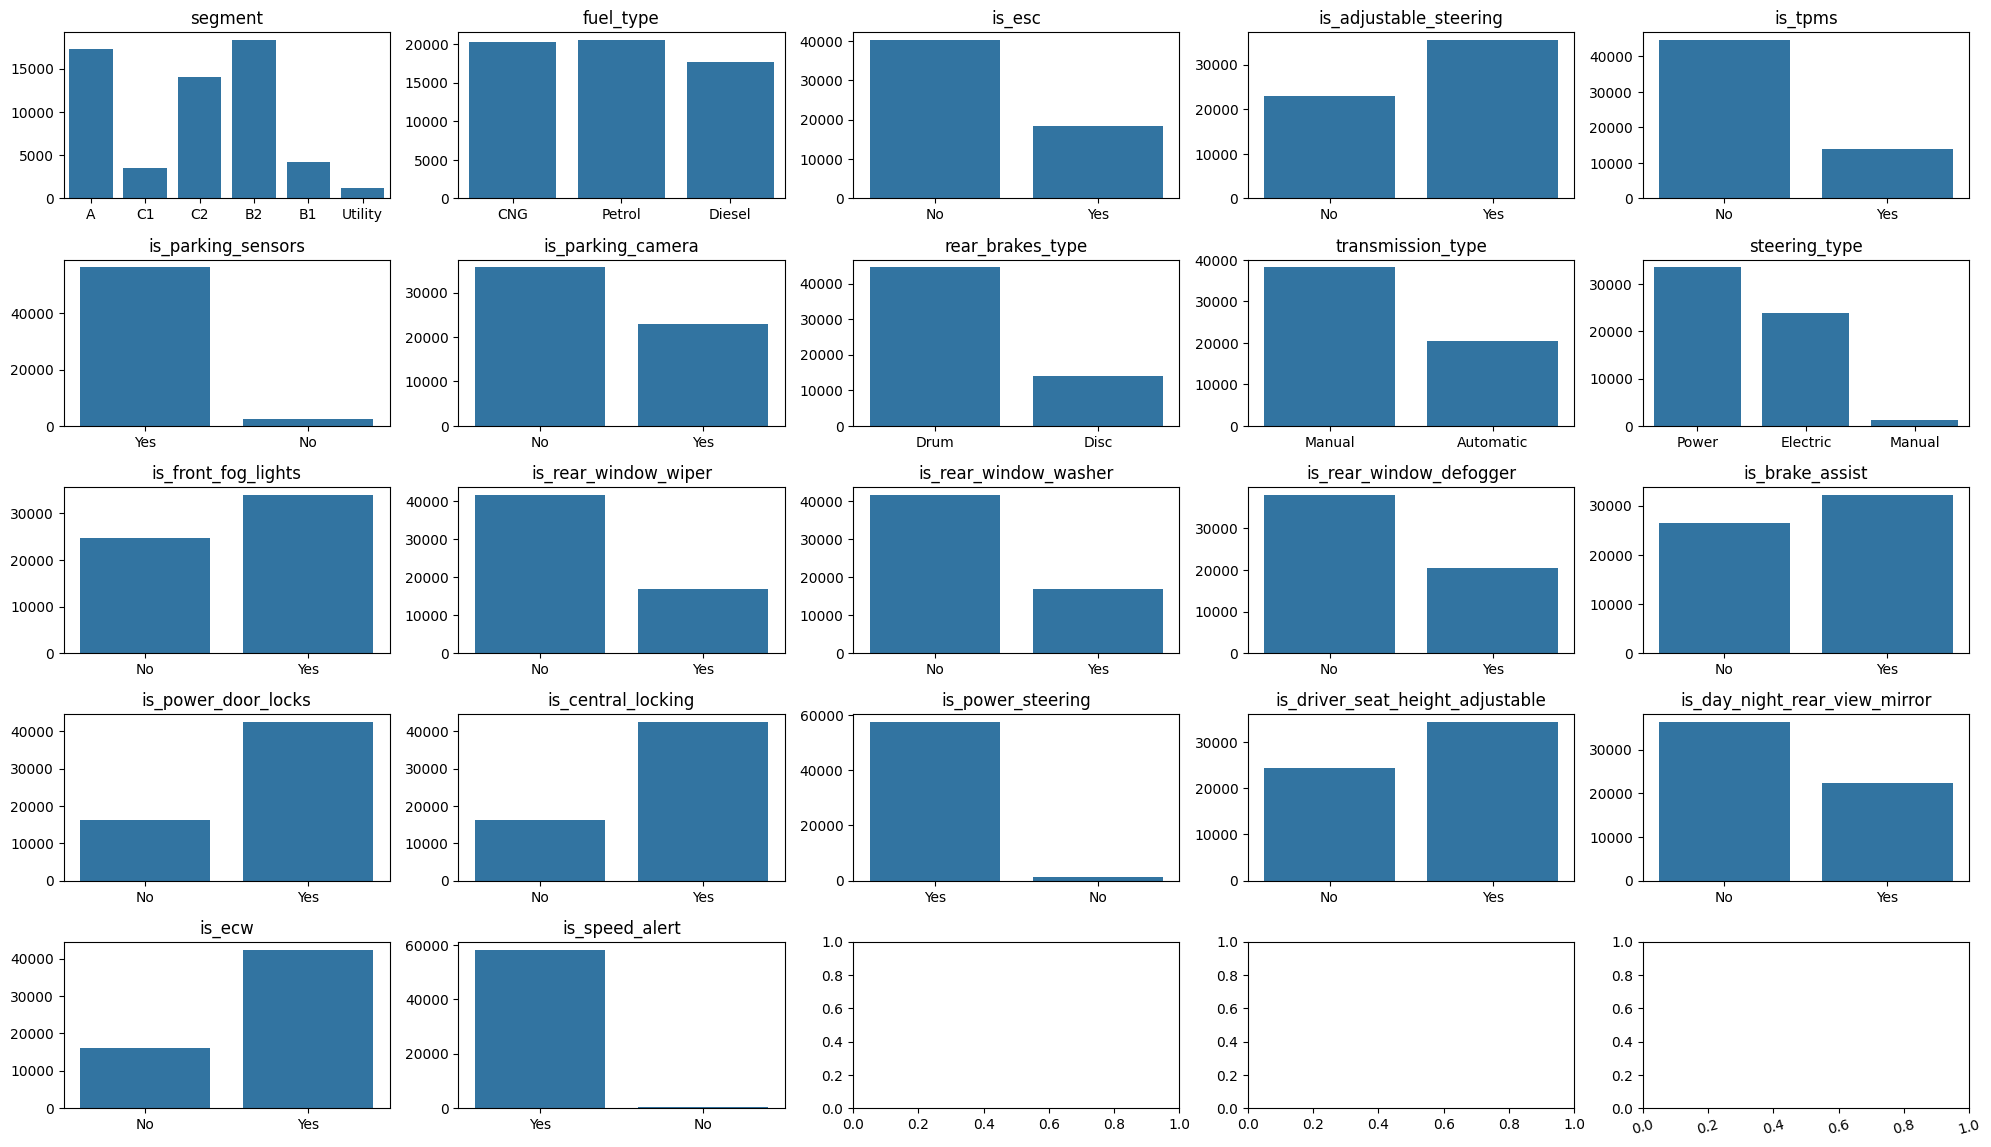

In [15]:
fig,axes = plt.subplots(5,5,figsize=(20,12))
for col,ax in zip(categorical_feature,axes.flatten()):
  sns.countplot(data=df,x=col,ax=ax)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.xticks(rotation=15)
plt.show()

policy_id
Cardinality :  58592

area_cluster
Cardinality :  22

model
Cardinality :  11

engine_type
Cardinality :  11



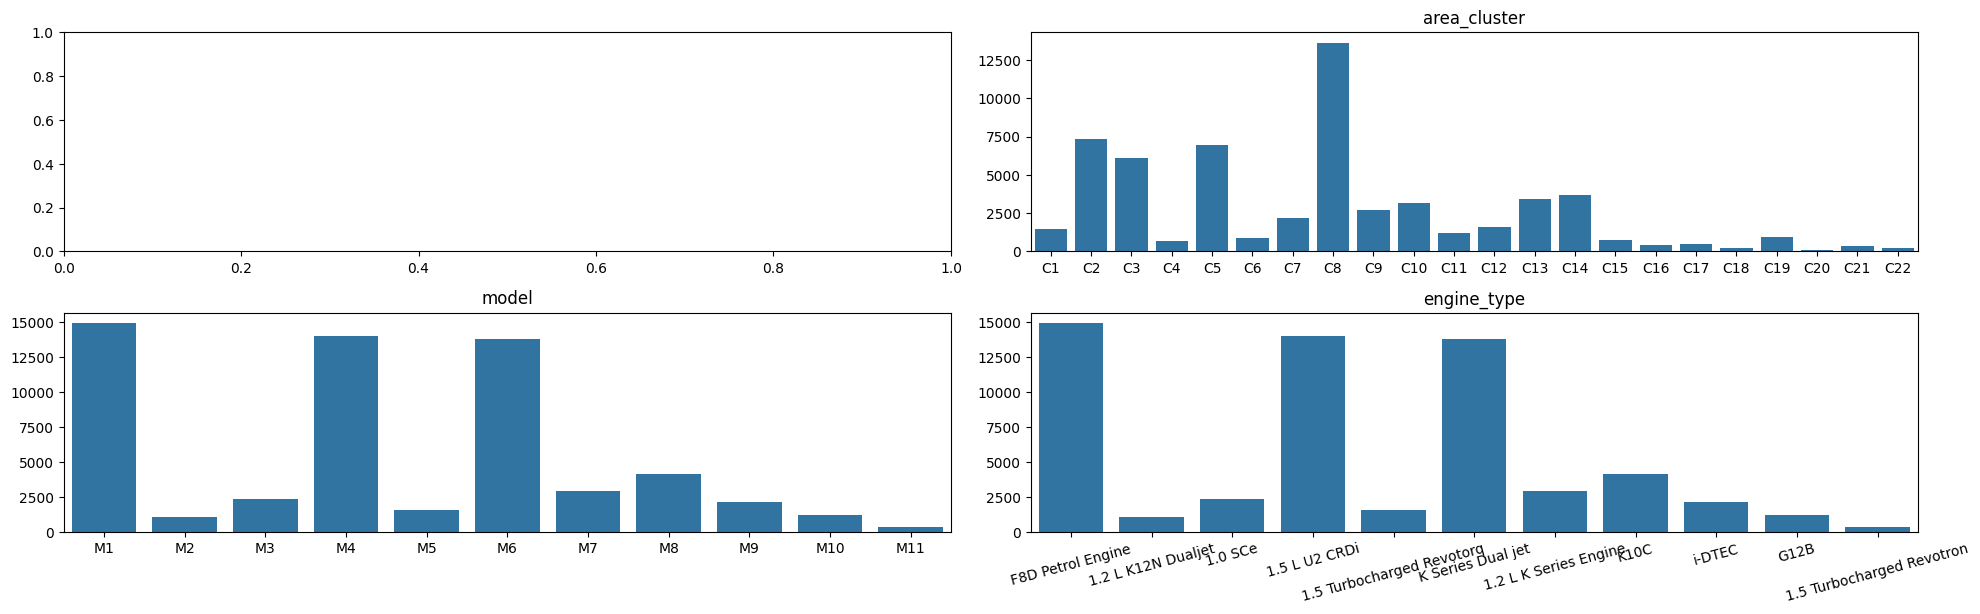

In [22]:
for feature in cardinal_feature:
  print(feature)
  print('Cardinality : ',df[feature].nunique())
  print()

fig,axes = plt.subplots(2,2,figsize=(20,6))
for col,ax in zip(cardinal_feature,axes.flatten()):
  if df[col].nunique() < 30:
    sns.countplot(data=df,x=col,ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.xticks(rotation=15)
plt.show()

## Multivariant Analysis

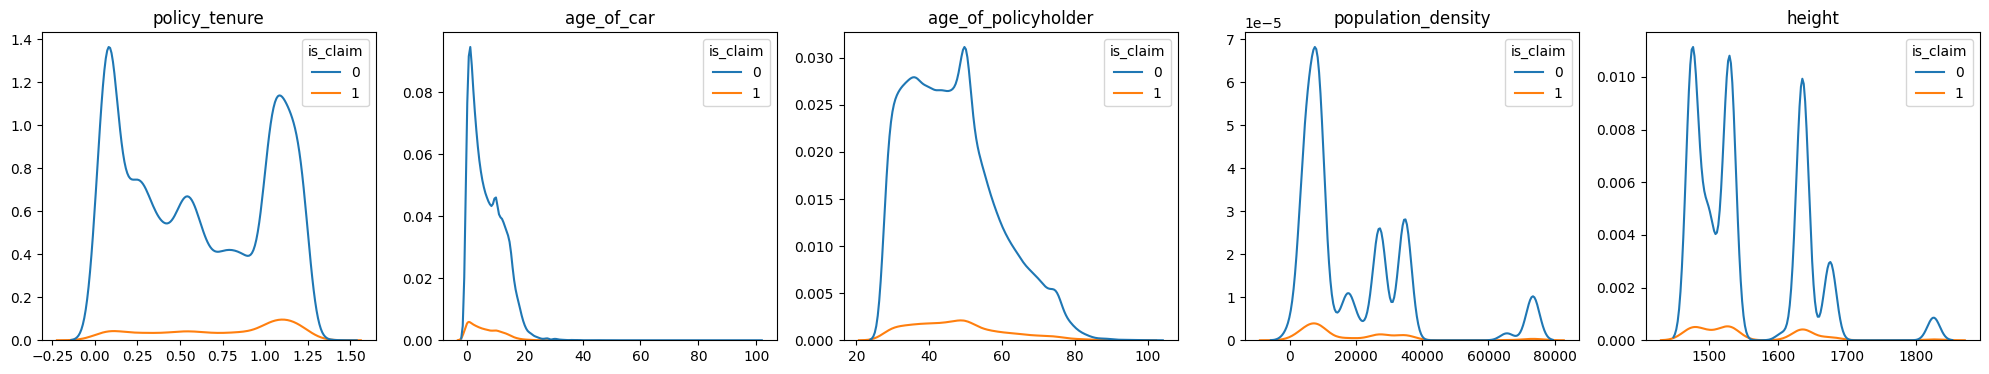

In [43]:
fig,axes = plt.subplots(1,5,figsize=(20,4))
for col,ax in zip(continues_feature,axes.flatten()):
  sns.kdeplot(data=df,x=col,ax=ax,hue=target_feature)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

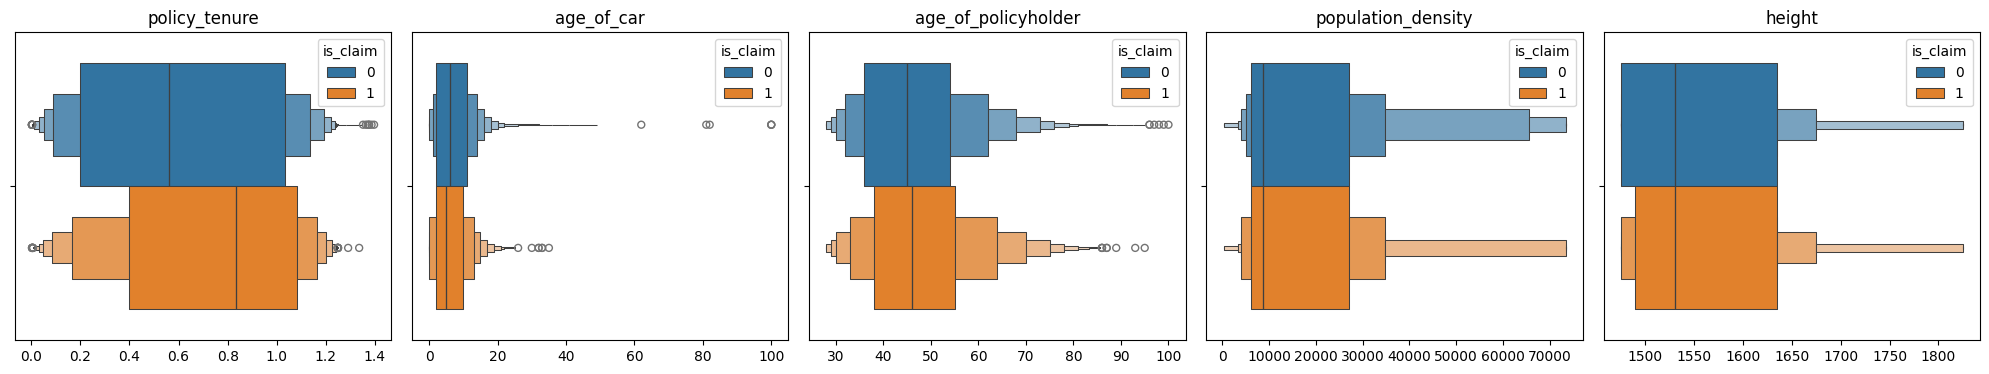

In [45]:
fig,axes = plt.subplots(1,5,figsize=(20,4))
for col,ax in zip(continues_feature,axes.flatten()):
  sns.boxenplot(data=df,x=col,ax=ax,hue=target_feature)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

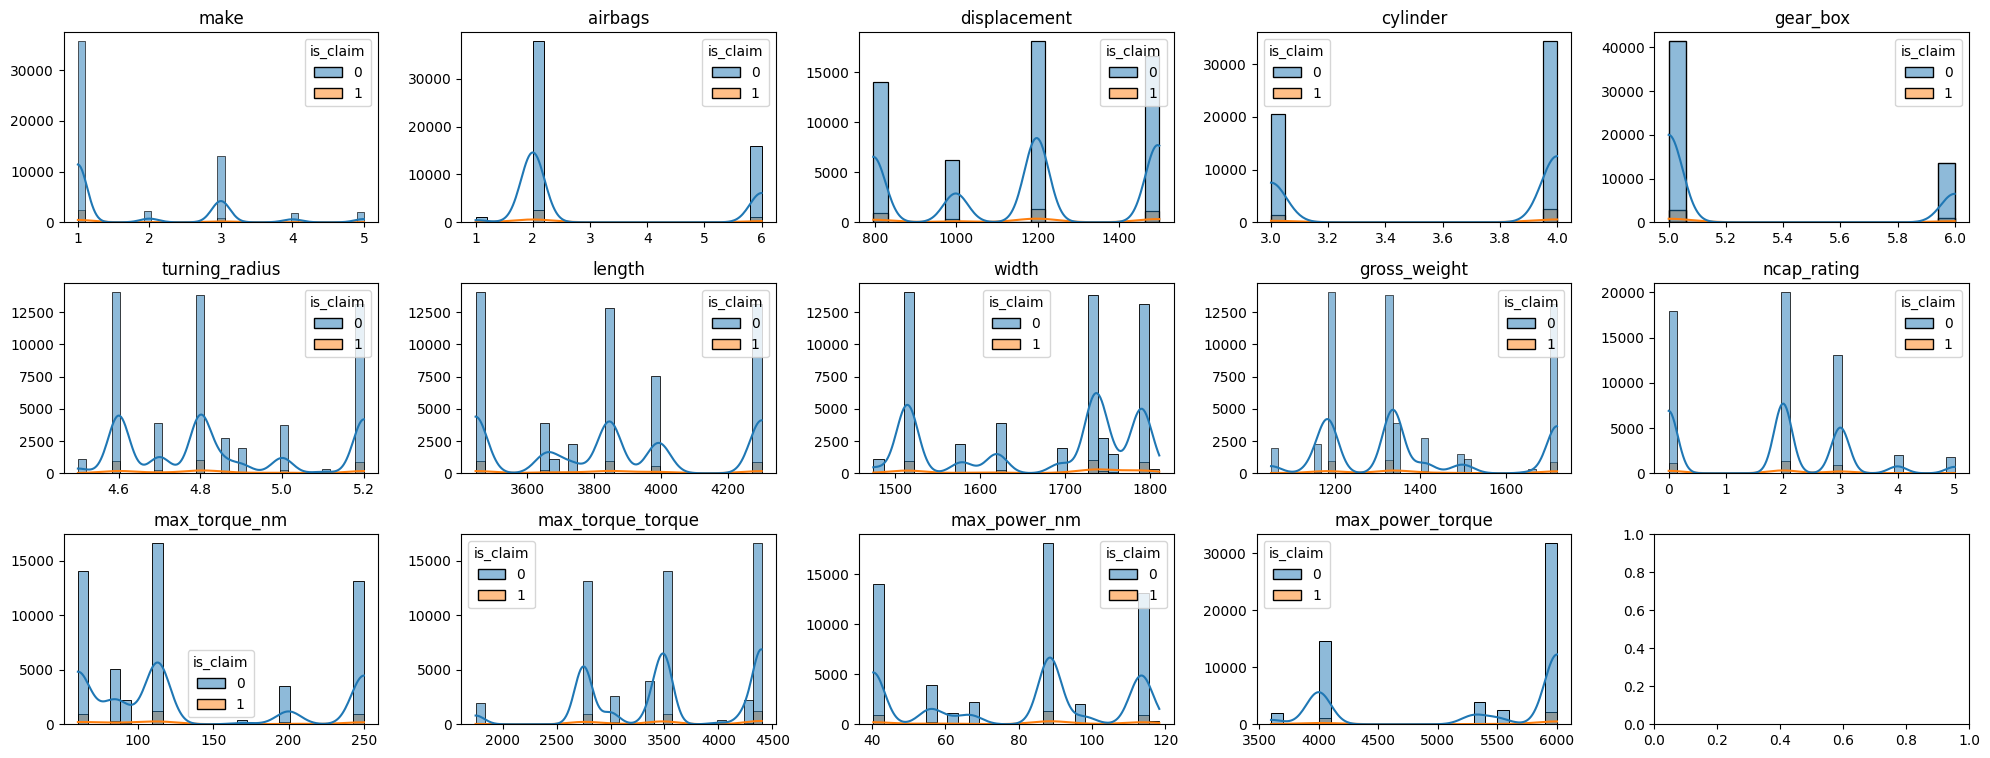

In [44]:
fig,axes = plt.subplots(3,5,figsize=(20,8))
for col,ax in zip(descrete_feature,axes.flatten()):
  sns.histplot(data=df,x=col,ax=ax,kde=True,hue=target_feature)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

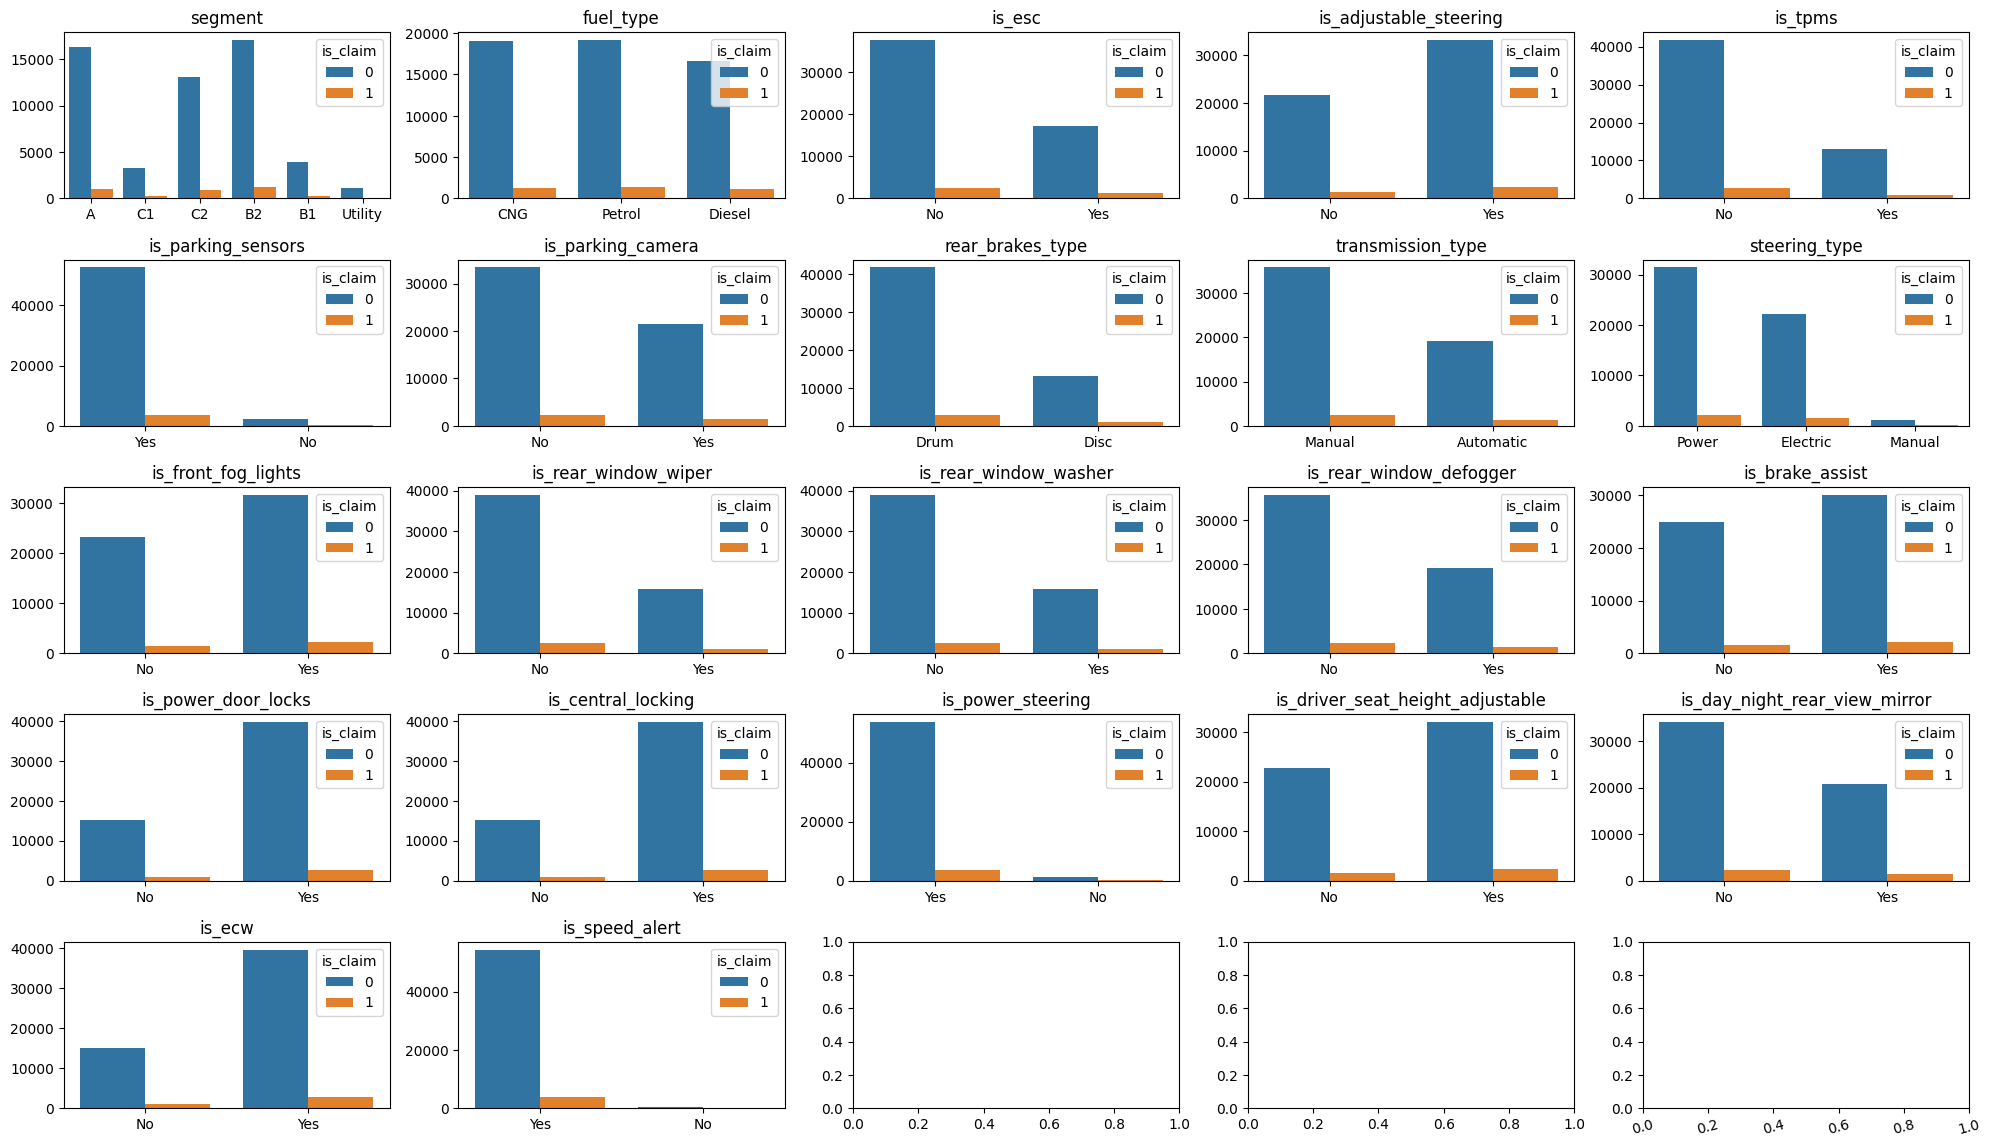

In [46]:
fig,axes = plt.subplots(5,5,figsize=(20,12))
for col,ax in zip(categorical_feature,axes.flatten()):
  sns.countplot(data=df,x=col,ax=ax,hue=target_feature)
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.xticks(rotation=15)
plt.show()

In [48]:
claim_data = df.query("is_claim == 1")

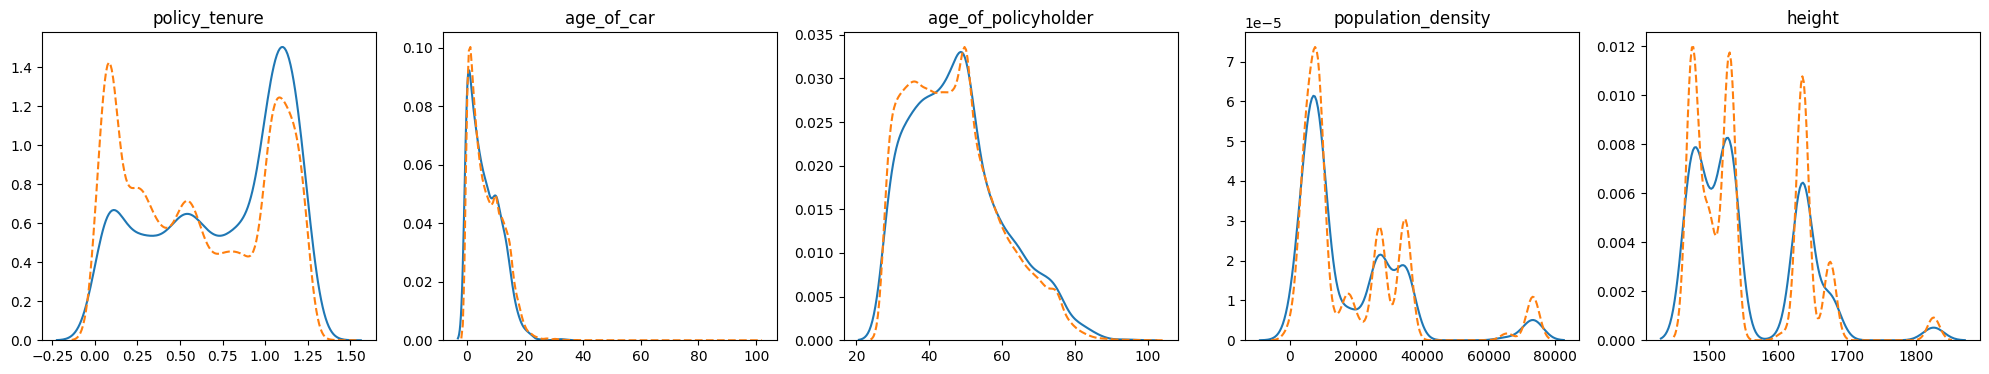

In [52]:
fig,axes = plt.subplots(1,5,figsize=(20,4))
for col,ax in zip(continues_feature,axes.flatten()):
  sns.kdeplot(data=claim_data,x=col,ax=ax)
  sns.kdeplot(data=df,x=col,ax=ax,ls='--')
  ax.set_title(col)
  ax.set_xlabel('')
  ax.set_ylabel('')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

## Feature Selection

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
from scipy.stats import chi2_contingency,f_oneway,ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
features_to_select = list()

In [169]:
# Chi Square test for two association between target and independent categorical features
# H0 : feature are independent (no association)
# H1 : feature are dependent (association)
# alpha : 0.05 confidence-l : 0.95%


for feature in categorical_feature + cardinal_feature[1:]:
  chi2, pval, _, _  = chi2_contingency(pd.crosstab(df[feature],df[target_feature]))
  print(f"Feature : {feature:{20}} Result : {f'Reject H0 (Associated, p-value:{pval}) **' if pval < 0.05 else 'Accept H0 (Not Assciated) --'}" )
  if pval < 0.05:
    features_to_select.append(feature)


Feature : segment              Result : Reject H0 (Associated, p-value:0.02738747673628079) **
Feature : fuel_type            Result : Accept H0 (Not Assciated) --
Feature : is_esc               Result : Accept H0 (Not Assciated) --
Feature : is_adjustable_steering Result : Reject H0 (Associated, p-value:0.0008041954126638532) **
Feature : is_tpms              Result : Accept H0 (Not Assciated) --
Feature : is_parking_sensors   Result : Reject H0 (Associated, p-value:0.046026600078480424) **
Feature : is_parking_camera    Result : Accept H0 (Not Assciated) --
Feature : rear_brakes_type     Result : Accept H0 (Not Assciated) --
Feature : transmission_type    Result : Accept H0 (Not Assciated) --
Feature : steering_type        Result : Accept H0 (Not Assciated) --
Feature : is_front_fog_lights  Result : Reject H0 (Associated, p-value:0.004438415801344458) **
Feature : is_rear_window_wiper Result : Accept H0 (Not Assciated) --
Feature : is_rear_window_washer Result : Accept H0 (Not Asscia

In [170]:
# ttest_ind to check if the mean of 2 class (1 & 0) are equal or not equal for all numerical features.
#  H0: the means of the samples are equal.
#  H1: the means of the samples are unequal.
# alpha : 0.05 confidence-l : 0.95%

groups = list()
for feature in descrete_feature + continues_feature:
  group = list()
  for cat in df[target_feature].unique():
    group = [value for value,category in zip(df[feature],df[target_feature]) if category == cat]
    groups.append(group)

  f_statistic, p_value = ttest_ind(*groups)
  print(f"Feature : {feature:{20}} Result : {f'Reject H0 (Not equal, p-value:{p_value}) **' if p_value < 0.05 else f'Accept H0 (Not equal, p-value:{p_value})'}" )
  if p_value < 0.05:
     features_to_select.append(feature)
  groups = list()

Feature : make                 Result : Accept H0 (Not equal, p-value:0.9121488360536878)
Feature : airbags              Result : Accept H0 (Not equal, p-value:0.4996526755376429)
Feature : displacement         Result : Accept H0 (Not equal, p-value:0.06310215766252036)
Feature : cylinder             Result : Reject H0 (Not equal, p-value:0.0011468318451899853) **
Feature : gear_box             Result : Accept H0 (Not equal, p-value:0.8777616296673278)
Feature : turning_radius       Result : Accept H0 (Not equal, p-value:0.5096346505223106)
Feature : length               Result : Accept H0 (Not equal, p-value:0.11594199374360714)
Feature : width                Result : Reject H0 (Not equal, p-value:0.01605028483903441) **
Feature : gross_weight         Result : Accept H0 (Not equal, p-value:0.3458577870636529)
Feature : ncap_rating          Result : Accept H0 (Not equal, p-value:0.35766647542929053)
Feature : max_torque_nm        Result : Accept H0 (Not equal, p-value:0.298615421831085

In [171]:
selected_df = df[features_to_select + [target_feature]]

In [138]:
selected_df.head()

,cylinder,width,policy_tenure,age_of_car,age_of_policyholder,population_density,segment,is_adjustable_steering,is_parking_sensors,is_front_fog_lights,is_brake_assist,is_driver_seat_height_adjustable,area_cluster,model,engine_type,is_claim
0,3,1515,0.515874,5,64,4990,A,No,Yes,No,No,No,C1,M1,F8D Petrol Engine,0
1,3,1515,0.672619,2,37,27003,A,No,Yes,No,No,No,C2,M1,F8D Petrol Engine,0
2,3,1515,0.841110,2,38,4076,A,No,Yes,No,No,No,C3,M1,F8D Petrol Engine,0
3,4,1735,0.900277,11,43,21622,C1,Yes,Yes,Yes,Yes,Yes,C4,M2,1.2 L K12N Dualjet,0
4,3,1579,0.596403,11,63,34738,A,No,No,No,No,No,C5,M3,1.0 SCe,0


In [172]:
selected_df_cat  = selected_df\
                    .select_dtypes(include='object')\
                    .columns.to_list()
selected_df_num  = selected_df\
                    .select_dtypes(exclude='object')\
                    .columns.to_list()

In [173]:
selected_df = pd.get_dummies(data=selected_df,
                             columns=selected_df_cat,
                             drop_first=True,
                             dtype=int)

In [178]:
X,y = selected_df.drop(target_feature,axis=1),selected_df[target_feature]

X_train, X_other, y_train, y_other = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_other)

print('Traning data: ',X_train.shape,'Testing data : ',X_test.shape,'Validation data : ',X_val.shape)

Traning data:  (46873, 57) Testing data :  (2344, 57) Validation data :  (9375, 57)


In [179]:
scaler = MinMaxScaler()

X_train[selected_df_num[:-1]] = scaler.fit_transform(X_train[selected_df_num[:-1]])
X_val[selected_df_num[:-1]] = scaler.transform(X_val[selected_df_num[:-1]])

In [187]:
processed_train = X_train.copy()
processed_val = X_val.copy()

In [181]:
# Applying Logit (Logistic regressor model)
mod = sm.Logit(y_train,processed_train[selected_df_num[:-1]]).fit(method='minimize',maxiter=100)
print(mod.summary())

Optimization terminated successfully.
         Current function value: 0.267660
         Iterations: 64
         Function evaluations: 65
         Gradient evaluations: 65
                           Logit Regression Results                           
Dep. Variable:               is_claim   No. Observations:                46873
Model:                          Logit   Df Residuals:                    46867
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                 -0.1259
Time:                        08:27:33   Log-Likelihood:                -12546.
converged:                       True   LL-Null:                       -11143.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
cylinder            

In [182]:
vif =  pd.DataFrame()
vif['Features'] = processed_train[selected_df_num[:-1]].columns
vif['VIF'] = [variance_inflation_factor(processed_train[selected_df_num[:-1]].values,i) for i in range(processed_train[selected_df_num[:-1]].shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,width,14.36
0,cylinder,10.18
2,policy_tenure,3.10
3,age_of_car,2.97
4,age_of_policyholder,2.68
5,population_density,1.75


In [184]:
processed_train = processed_train[selected_df_num[:-1]].drop('width',axis=1)

In [185]:
# Applying Logit (Logistic regressor model)
mod = sm.Logit(y_train,processed_train).fit(method='minimize',maxiter=100)
print(mod.summary())

Optimization terminated successfully.
         Current function value: 0.272917
         Iterations: 54
         Function evaluations: 55
         Gradient evaluations: 55
                           Logit Regression Results                           
Dep. Variable:               is_claim   No. Observations:                46873
Model:                          Logit   Df Residuals:                    46868
Method:                           MLE   Df Model:                            4
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                 -0.1480
Time:                        08:28:36   Log-Likelihood:                -12792.
converged:                       True   LL-Null:                       -11143.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
cylinder            

In [186]:
vif =  pd.DataFrame()
vif['Features'] = processed_train.columns
vif['VIF'] = [variance_inflation_factor(processed_train.values,i) for i in range(processed_train.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,cylinder,2.96
1,policy_tenure,2.95
2,age_of_car,2.77
3,age_of_policyholder,2.61
4,population_density,1.72


In [202]:
processed_train = X_train.drop('width',axis=1).copy()
processed_val = X_val.drop('width',axis=1).copy()

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score

In [203]:
models_dict = {'LogisticR':LogisticRegression,
               'BernoulliNB':BernoulliNB,
               'RandomFC':RandomForestClassifier,
               'GradientBC':GradientBoostingClassifier,
               'AdaBC':AdaBoostClassifier
               }

models_performance = {
                      'Models':list(),
                      'CV_Score':list()
                      }

for model_name,model in models_dict.items():
  scores = cross_val_score(model(),processed_train,y_train,cv=5,scoring='roc_auc')
  print(model_name,f'Roc_auc :',round(np.mean(scores),3))
  models_performance['Models'].append(model_name)
  models_performance['CV_Score'].append(round(np.mean(scores),3))

LogisticR Roc_auc : 0.611
BernoulliNB Roc_auc : 0.548
RandomFC Roc_auc : 0.563
GradientBC Roc_auc : 0.651
AdaBC Roc_auc : 0.633


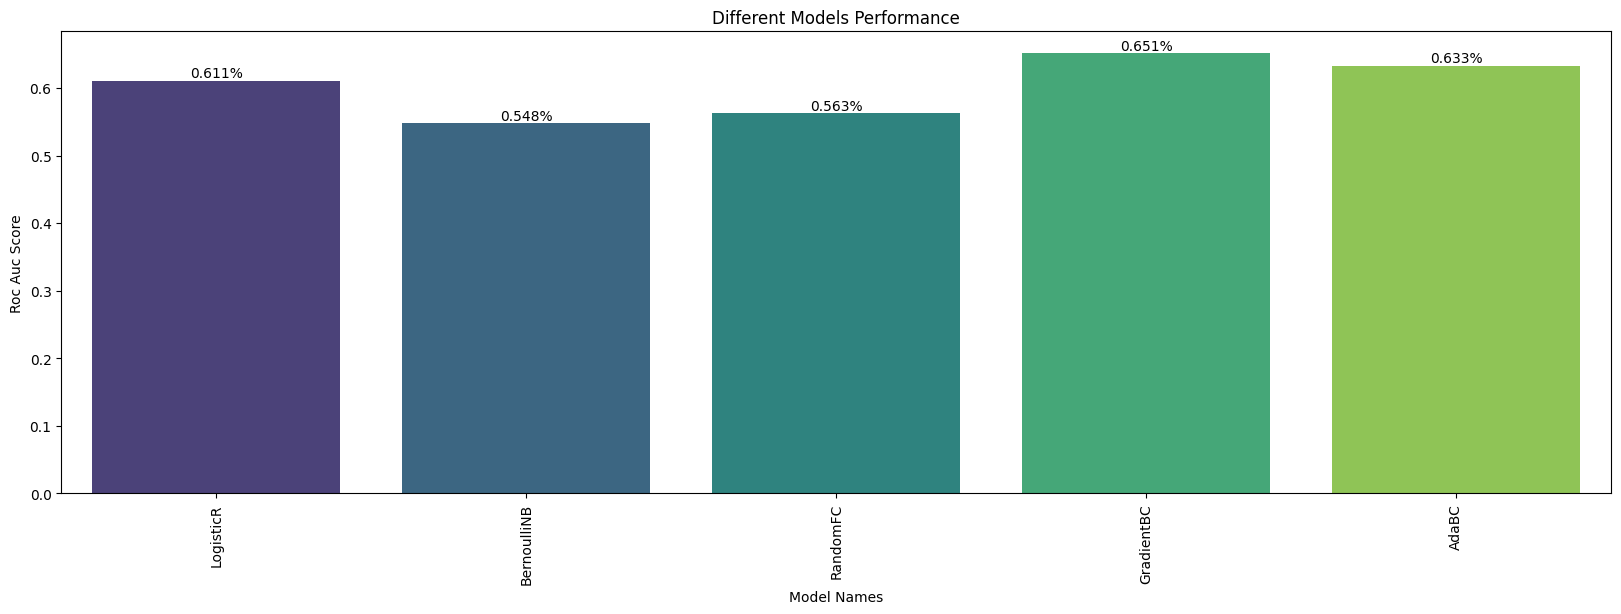

In [206]:
plt.figure(figsize=(20, 6))
bar_plot = sns.barplot(x='Models', y='CV_Score',
                       data=models_performance, palette='viridis')

# Add title and labels
plt.title('Different Models Performance')
plt.xlabel('Model Names')
plt.ylabel('Roc Auc Score')
plt.xticks(rotation=90)

# Add percentage labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()